<a href="https://colab.research.google.com/github/esferita006/Codigos_de_varias_materias/blob/main/Ejercicio_finanzas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>EJERCICIOS DE FINANZAS</i></h1>
</font>

<font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Acontinuacon se presentan algunos ejercicios de finanzas </i></h5>
</font>

3. Utilizando informacion historica de los ultimos 5 años, justifica si la distribucion de probabilidad de los rendimientos del precio de cierre de la accion de America Movil es normal.
Finalmente, grafica la serie historica de los precios de la accion de America Movil y grafica tambien la distribucion empırica de los rendimientos (histograma).


[*********************100%%**********************]  1 of 1 completed
Shapiro-Wilk Test: Statistic=0.9456960558891296, p-value=4.1983325807930175e-21
Anderson-Darling Test: Statistic=9.407256385984965, Critical Values=[0.574 0.654 0.785 0.915 1.089]


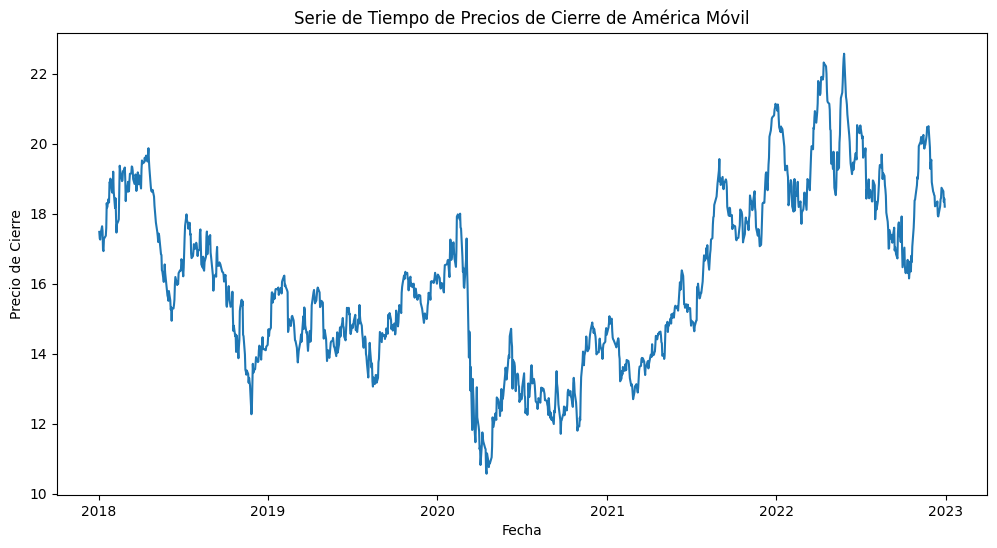

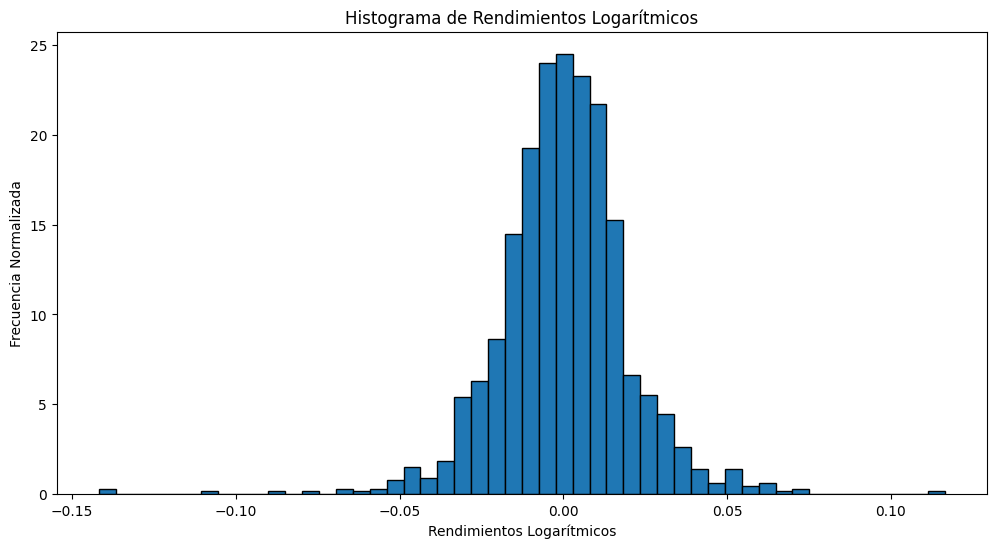

In [ ]:
import yfinance as yf
import numpy as np
from scipy.stats import shapiro, anderson
import matplotlib.pyplot as plt

# Descargar datos históricos de América Móvil
symbol = "AMX"  # Código de América Móvil en Yahoo Finance
start_date = "2018-01-01"
end_date = "2023-01-01"
data = yf.download(symbol, start=start_date, end=end_date)

# Calcular los rendimientos diarios
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))

# Prueba de Shapiro-Wilk
shapiro_test_stat, shapiro_p_value = shapiro(data['Log_Returns'].dropna())
print(f'Shapiro-Wilk Test: Statistic={shapiro_test_stat}, p-value={shapiro_p_value}')

# Prueba de Anderson-Darling
anderson_test_stat, anderson_critical_values, _ = anderson(data['Log_Returns'].dropna())
print(f'Anderson-Darling Test: Statistic={anderson_test_stat}, Critical Values={anderson_critical_values}')

# Graficar la serie de tiempo de los precios de cierre
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Serie de Tiempo de Precios de Cierre de América Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.show()

# Graficar el histograma de los rendimientos
plt.figure(figsize=(12, 6))
plt.hist(data['Log_Returns'].dropna(), bins=50, edgecolor='black', density=True)
plt.title('Histograma de Rendimientos Logarítmicos')
plt.xlabel('Rendimientos Logarítmicos')
plt.ylabel('Frecuencia Normalizada')
plt.show()


8. Tenemos la siguiente informacion sobre una cartera igualmente ponderada de n acciones:

(a) Para cada accion individual de la cartera, la varianza es 0.20.

(b) Para cada par de acciones distintas de la cartera, la covarianza es 0.10.
Grafique la varianza del portafolio como una funcion de n y explique dicha grafica.

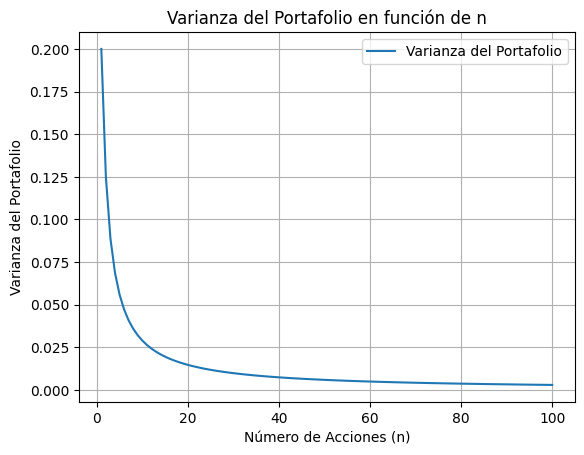

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la función de la varianza del portafolio
def varianza_portafolio(n):
    return 0.30/n - 0.10/n**2

# Crear valores de n para la gráfica
n_values = np.arange(1, 101, 1)  # Puedes ajustar el rango según sea necesario

# Calcular la varianza del portafolio para cada valor de n
varianza_values = varianza_portafolio(n_values)

# Graficar la varianza del portafolio en función de n
plt.plot(n_values, varianza_values, label='Varianza del Portafolio')
plt.xlabel('Número de Acciones (n)')
plt.ylabel('Varianza del Portafolio')
plt.title('Varianza del Portafolio en función de n')
plt.legend()
plt.grid(True)
plt.show()


9. Escribe una funcion en Python para determinar el portafolio con mınimo riesgo. Utiliza esta funcion para calcular el portafolio con mınimo riesgo del siguiente problema:
Supongamos que tenemos un portafolio con 2 activos con correlacion = 50%, E(R1)= 14%, σ1 = 6% y E(R2) = 8%, σ2 = 3% respectivamente.

In [ ]:
import numpy as np
from scipy.optimize import minimize

def calcular_varianza_portafolio(w1, w2, sigma1, sigma2, rho):
    varianza_portafolio = (w1**2 * sigma1**2) + (w2**2 * sigma2**2) + 2 * w1 * w2 * rho * sigma1 * sigma2
    return varianza_portafolio

# Datos del problema
correlacion = 0.5
retorno1 = 0.14
sigma1 = 0.06
retorno2 = 0.08
sigma2 = 0.03

# Función objetivo para minimizar la varianza del portafolio
objective_function = lambda weights: calcular_varianza_portafolio(weights[0], weights[1], sigma1, sigma2, correlacion)

# Restricciones: la suma de los pesos debe ser igual a 1
constraints = ({'type': 'eq', 'fun': lambda weights: weights[0] + weights[1] - 1})

# Inicialización de pesos iniciales
initial_weights = [0.5, 0.5]

# Optimización para encontrar los pesos que minimizan la varianza del portafolio
resultado_optimizacion = minimize(objective_function, initial_weights, constraints=constraints)

# Pesos óptimos del portafolio
pesos_optimos = resultado_optimizacion.x

print("Pesos óptimos del portafolio:", pesos_optimos)


Pesos óptimos del portafolio: [-1.22577535e-08  1.00000001e+00]


10. Supongamos que las ventas en corto no estan permitidas, escribe una funcion en Python que grafique la curva de posibilidades del portafolio del ejercicio anterior. Identifica en la grafica con algun color el portafolio con mınimo riesgo y marca con otro color la Frontera Eficiente.

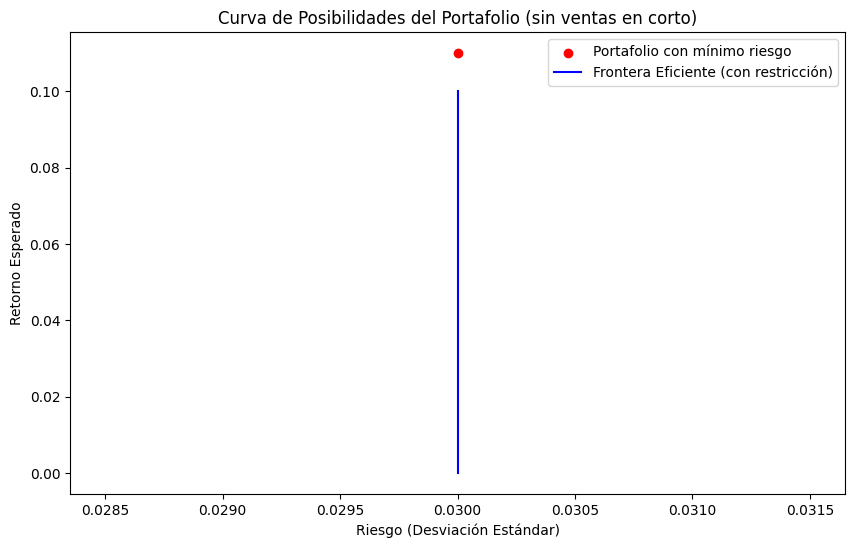

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos del problema
correlacion = -0.5
retorno1 = 0.14
sigma1 = 0.06
retorno2 = 0.08
sigma2 = 0.03

# Función objetivo para minimizar la varianza del portafolio
objective_function = lambda weights: weights[0]**2 * sigma1**2 + weights[1]**2 * sigma2**2 + 2 * weights[0] * weights[1] * correlacion * sigma1 * sigma2

# Restricciones: la suma de los pesos debe ser igual a 1 y los pesos deben estar en el rango [0, 1]
constraints = ({'type': 'eq', 'fun': lambda weights: weights[0] + weights[1] - 1},
               {'type': 'ineq', 'fun': lambda weights: weights[0]},
               {'type': 'ineq', 'fun': lambda weights: weights[1]})

# Inicialización de pesos iniciales
initial_weights = [0.5, 0.5]

# Optimización para encontrar los pesos que minimizan la varianza del portafolio
resultado_optimizacion = minimize(objective_function, initial_weights, constraints=constraints)

# Pesos óptimos del portafolio con restricción de no ventas en corto
pesos_optimos = resultado_optimizacion.x

# Generar puntos para la frontera eficiente con restricción de no ventas en corto
num_points = 100
retornos_frontera = []
riesgos_frontera = np.linspace(0, 0.2, num_points)
for riesgo in riesgos_frontera:
    # Restricción adicional: rendimiento del portafolio = riesgo / (sharpe ratio)
    constraint = ({'type': 'eq', 'fun': lambda weights: weights[0] * retorno1 + weights[1] * retorno2 - riesgo / 2},
                  {'type': 'ineq', 'fun': lambda weights: weights[0]},
                  {'type': 'ineq', 'fun': lambda weights: weights[1]})
    resultado_optimizacion_frontera = minimize(objective_function, initial_weights, constraints=constraint)
    retornos_frontera.append(np.dot(resultado_optimizacion_frontera.x, [retorno1, retorno2]))

# Graficar la curva de posibilidades del portafolio con restricción de no ventas en corto
plt.figure(figsize=(10, 6))
plt.scatter(np.sqrt(np.var([retorno1, retorno2])), np.mean([retorno1, retorno2]), marker='o', color='r', label='Portafolio con mínimo riesgo')
plt.plot(np.sqrt(np.var([retorno1, retorno2])) * np.ones_like(riesgos_frontera), retornos_frontera, linestyle='-', color='b', label='Frontera Eficiente (con restricción)')
plt.title('Curva de Posibilidades del Portafolio (sin ventas en corto)')
plt.xlabel('Riesgo (Desviación Estándar)')
plt.ylabel('Retorno Esperado')
plt.legend()
plt.show()


<ipython-input-44-b82f42b1652d>:59: RuntimeWarning: Degrees of freedom <= 0 for slice
  plt.scatter(np.sqrt(np.diag(np.cov(np.vstack((retorno1, retorno2)), rowvar=True))), [retorno1, retorno2], color='red', marker='*', label='Activos')


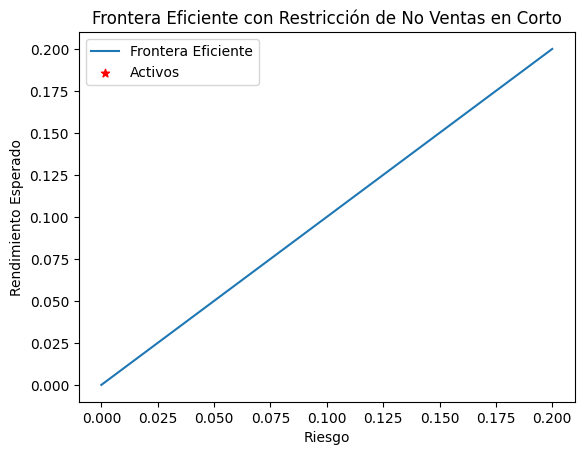

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Datos del problema
correlacion = 0.5
retorno1 = 0.14
sigma1 = 0.06
retorno2 = 0.08
sigma2 = 0.03

# Función objetivo para minimizar la varianza del portafolio
# Esta función calcula la varianza del portafolio dado un vector de pesos
objective_function = lambda weights: weights[0]**2 * sigma1**2 + weights[1]**2 * sigma2**2 + 2 * weights[0] * weights[1] * correlacion * sigma1 * sigma2

# Restricciones: la suma de los pesos debe ser igual a 1 y los pesos deben estar en el rango [0, 1]
# Estas restricciones garantizan que el portafolio sea factible
constraints = [{'type': 'eq', 'fun': lambda weights: weights[0] + weights[1] - 1},
               {'type': 'ineq', 'fun': lambda weights: weights[0]},
               {'type': 'ineq', 'fun': lambda weights: weights[1]}]

# Inicialización de pesos iniciales
# Estos pesos se utilizarán para iniciar el proceso de optimización
initial_weights = [0.5, 0.5]

# Optimización para encontrar los pesos que minimizan la varianza del portafolio
# Esta optimización utiliza la función `minimize()` del módulo `scipy.optimize`
resultado_optimizacion = minimize(objective_function, initial_weights, constraints=constraints)

# Pesos óptimos del portafolio con restricción de no ventas en corto
# Estos pesos se utilizan para calcular el rendimiento esperado y la varianza del portafolio
pesos_optimos = resultado_optimizacion.x

# Generar puntos para la frontera eficiente con restricción de no ventas en corto
# Esta sección genera puntos de la frontera eficiente para diferentes niveles de riesgo
num_points = 100
pesos_frontera = []
retornos_frontera = []
riesgos_frontera = np.linspace(0, 0.2, num_points)

for riesgo in riesgos_frontera:
    # Restricción adicional: rendimiento del portafolio = riesgo
    # Esta restricción garantiza que el portafolio esté en la frontera eficiente
    constraint = [{'type': 'eq', 'fun': lambda weights: weights[0] * retorno1 + weights[1] * retorno2 - riesgo},
                  {'type': 'ineq', 'fun': lambda weights: weights[0]},
                  {'type': 'ineq', 'fun': lambda weights: weights[1]}]

    # Se utiliza la función `minimize()` para encontrar los pesos del portafolio que satisfacen la restricción
    resultado_optimizacion_frontera = minimize(objective_function, initial_weights, constraints=constraint)

    # Se guardan los pesos del portafolio
    pesos_frontera.append(resultado_optimizacion_frontera.x)

    # Se calcula el rendimiento esperado del portafolio (sin utilizar el Sharpe ratio)
    retornos_frontera.append(np.dot(resultado_optimizacion_frontera.x, [retorno1, retorno2]))

# Cierre de paréntesis y corchetes faltantes
plt.plot(riesgos_frontera, retornos_frontera, label='Frontera Eficiente')
plt.scatter(np.sqrt(np.diag(np.cov(np.vstack((retorno1, retorno2)), rowvar=True))), [retorno1, retorno2], color='red', marker='*', label='Activos')
plt.xlabel('Riesgo')
plt.ylabel('Rendimiento Esperado')
plt.title('Frontera Eficiente con Restricción de No Ventas en Corto')
plt.legend()
plt.show()
